In [3]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/res10km_2804_Ttave/'

In [5]:
ds = open_mdsdataset(ddir, grid_dir=op.join(ddir,'../'),
                    iters=range(4320,1300320,4320),
                    prefix=['Ttave'], ignore_unknown_vars=True)
ds

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/res10km_2804_Ttave/. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 300)
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * XG       (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG      (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG      (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (

In [6]:
th = ds.Ttave
th.attrs = ds.Ttave.attrs
th

<xarray.DataArray 'Ttave' (time: 300, Z: 40, YC: 200, XC: 100)>
dask.array<shape=(300, 40, 200, 100), dtype=float32, chunksize=(1, 40, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 200, 100), chunksize=(40, 200, 100)>
    iter     (time) int64 dask.array<shape=(300,), chunksize=(1,)>
  * time     (time) int64 4320 8640 12960 17280 21600 25920 30240 34560 ...
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Potent

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


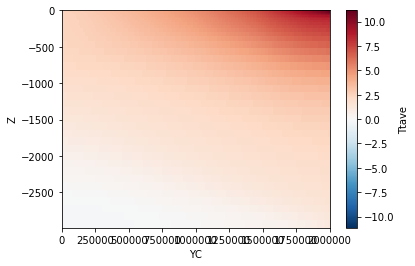

In [7]:
th.mean(['time','XC']).plot(x='YC',y='Z')

In [9]:
th_mon = xr.DataArray(th.data.reshape((25,12,40,200,100)),
                     dims=['iYEAR','iMONTH','Z','YC','XC'],
                     coords={'iYEAR':range(25),'iMONTH':range(12),'Z':ds.Z.data,
                            'YC':ds.YC.data,'XC':ds.XC.data}
                     ).mean(['iYEAR','XC']).compute()
th_mon

<xarray.DataArray 'reshape-e124c7e6b354fbe77a5401ddfe417583' (iMONTH: 12, Z: 40, YC: 200)>
array([[[ 0.      ,  2.678399, ..., 11.098519, 11.386806],
        [ 0.      ,  2.654471, ..., 10.969768, 11.161586],
        ...,
        [ 0.      , -0.160981, ...,  1.278802,  1.322948],
        [ 0.      , -0.170683, ...,  1.103004,  1.162643]],

       [[ 0.      ,  2.842462, ..., 11.478579, 11.774017],
        [ 0.      ,  2.795817, ..., 11.322143, 11.478632],
        ...,
        [ 0.      , -0.161281, ...,  1.288731,  1.332767],
        [ 0.      , -0.169604, ...,  1.110288,  1.174366]],

       ...,

       [[ 0.      ,  2.358556, ..., 10.452971, 10.675097],
        [ 0.      ,  2.359664, ..., 10.446494, 10.670115],
        ...,
        [ 0.      , -0.154152, ...,  1.324874,  1.366973],
        [ 0.      , -0.159536, ...,  1.153175,  1.213794]],

       [[ 0.      ,  2.36428 , ..., 10.754844, 11.015194],
        [ 0.      ,  2.364916, ..., 10.705514, 10.940224],
        ...,
        [ 0.

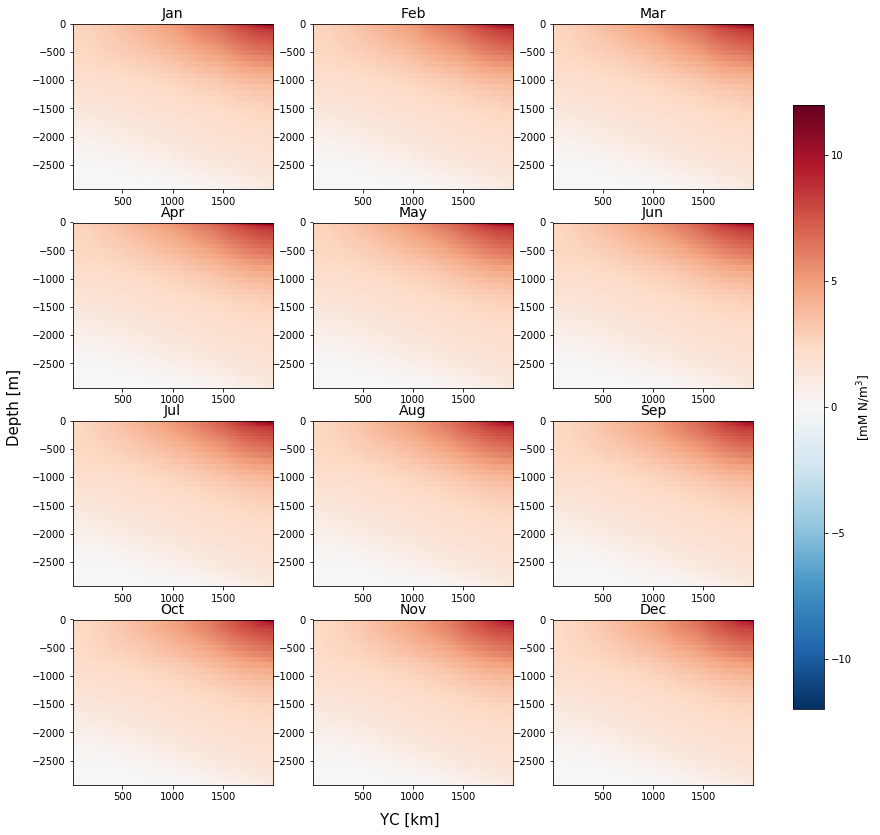

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,14))
cax = axes[0,0].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[0], 
                         vmin=-1.2e1, vmax=1.2e1, 
                         cmap='RdBu_r', rasterized=True)
axes[0,1].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[1], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[0,2].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[2], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)

axes[1,0].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[3], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[1,1].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[4], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[1,2].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[5], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)

axes[2,0].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[6], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[2,1].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[7], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[2,2].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[8], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)

axes[3,0].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[9], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[3,1].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[10], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)
axes[3,2].pcolormesh(th_mon.YC*1e-3, th_mon.Z, th_mon[11], 
                     vmin=-1.2e1, vmax=1.2e1, 
                     cmap='RdBu_r', rasterized=True)

axes[0,0].set_title('Jan',fontsize=14)
axes[0,1].set_title('Feb',fontsize=14)
axes[0,2].set_title('Mar',fontsize=14)
axes[1,0].set_title('Apr',fontsize=14)
axes[1,1].set_title('May',fontsize=14)
axes[1,2].set_title('Jun',fontsize=14)
axes[2,0].set_title('Jul',fontsize=14)
axes[2,1].set_title('Aug',fontsize=14)
axes[2,2].set_title('Sep',fontsize=14)
axes[3,0].set_title('Oct',fontsize=14)
axes[3,1].set_title('Nov',fontsize=14)
axes[3,2].set_title('Dec',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.06, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=15)
fig.text(0.43, 0.09, 'YC [km]', 
         va='center', rotation='horizontal', fontsize=15)

plt.savefig(op.join(ddir,'THETA_3D2804-transect_monthlyclim.pdf'))

Text(0,0.5,'Temp [$^\\circ$C]')

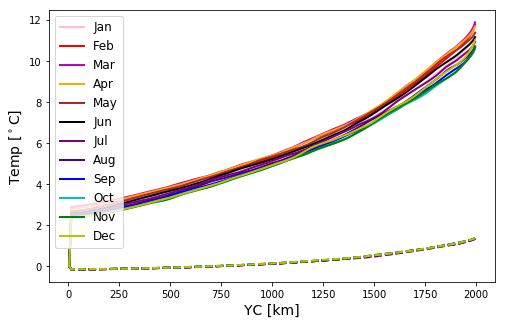

In [18]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, ax = plt.subplots(figsize=(8,5))
for i in range(12):
    ax.plot(th_mon.YC*1e-3, th_mon[i,0], lw=2, color=colors[i], label=months[i])
    ax.plot(th_mon.YC*1e-3, th_mon[i,-2].data, '--', lw=2, color=colors[i])
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('YC [km]', fontsize=14)
ax.set_ylabel(r'Temp [$^\circ$C]', fontsize=14)